### Project -- Electricity Demand Forecasting

In [199]:
import pandas as pd  # 1pd.read_csv pd.to_datetime(colu)            # objresult.info()  df.set_index(namecolum)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import random 

In [200]:
data=pd.read_csv('python machine learning model xgboost - electricity demand dataset.csv')

In [201]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [202]:
#check the basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [203]:
# convert the first column datatype to datetime format
data['Timestamp']=pd.to_datetime(data['Timestamp'])

C:\Users\ZAKARIA BOULLAM\AppData\Local\Temp\ipykernel_41912\3121386239.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp']=pd.to_datetime(data['Timestamp'])


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


In [205]:
#change index to Timestamp
data=data.set_index('Timestamp')

In [206]:
#use describe method to check for statistic summary
data[['Temperature','Humidity','Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [207]:
#check for null values
data.isnull().sum(axis=0)

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [208]:
# to show the records that contains any null values
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [209]:
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
data=data.dropna(how='all')

In [211]:
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,


In [212]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [213]:
#backward fill temperature humidity 
data[['Temperature','Humidity']]=data[['Temperature','Humidity']].bfill()

In [214]:
data.columns

Index(['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'Temperature',
       'Humidity', 'Demand'],
      dtype='object')

In [215]:
data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']]=data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()

In [216]:
data.isnull().sum()

hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         3
dtype: int64

In [217]:
data[data['Demand'].isnull()]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-12-14,14.0,1.0,12.0,2021.0,348.0,15.403995,74.011557,NaN
2022-06-18,5.0,5.0,6.0,2022.0,169.0,38.349174,58.285814,NaN
2024-01-27,19.0,5.0,1.0,2024.0,27.0,14.351975,29.670256,NaN


In [218]:
data.loc['2021-12-14']

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-12-14,0.0,1.0,12.0,2021.0,348.0,3.000000,68.130221,2666.473994
2021-12-14,1.0,1.0,12.0,2021.0,348.0,3.000000,82.355319,2497.402350
2021-12-14,2.0,1.0,12.0,2021.0,348.0,3.000000,82.372771,2310.252259
2021-12-14,3.0,1.0,12.0,2021.0,348.0,3.775401,68.484423,2403.952711
2021-12-14,4.0,1.0,12.0,2021.0,348.0,3.000000,76.031938,2463.494361
2021-12-14,4.0,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612
2021-12-14,6.0,1.0,12.0,2021.0,348.0,11.422921,68.796025,3969.020428
2021-12-14,7.0,1.0,12.0,2021.0,348.0,16.205830,76.864170,4383.858890
2021-12-14,8.0,1.0,12.0,2021.0,348.0,15.184533,60.913382,4650.211725


In [219]:
data['Demand']=data['Demand'].interpolate(method='linear')#time not working here 

In [220]:
data.loc['2021-12-14']

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-12-14,0.0,1.0,12.0,2021.0,348.0,3.000000,68.130221,2666.473994
2021-12-14,1.0,1.0,12.0,2021.0,348.0,3.000000,82.355319,2497.402350
2021-12-14,2.0,1.0,12.0,2021.0,348.0,3.000000,82.372771,2310.252259
2021-12-14,3.0,1.0,12.0,2021.0,348.0,3.775401,68.484423,2403.952711
2021-12-14,4.0,1.0,12.0,2021.0,348.0,3.000000,76.031938,2463.494361
2021-12-14,4.0,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612
2021-12-14,6.0,1.0,12.0,2021.0,348.0,11.422921,68.796025,3969.020428
2021-12-14,7.0,1.0,12.0,2021.0,348.0,16.205830,76.864170,4383.858890
2021-12-14,8.0,1.0,12.0,2021.0,348.0,15.184533,60.913382,4650.211725


In [221]:
data.shape

(43844, 8)

### Feature Engineering

In [222]:
#create the quarter column
data.insert(4,'quarter',data.index.quarter)

In [223]:
data

,hour,dayofweek,month,year,quarter,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,4,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,4,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,4,366.0,3.000000,40.565916,4015.979957


In [224]:
#convert columns to int
data[['hour', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear']]=data[['hour', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear']].astype(int)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  int64  
 1   dayofweek    43844 non-null  int64  
 2   month        43844 non-null  int64  
 3   year         43844 non-null  int64  
 4   quarter      43844 non-null  int64  
 5   dayofyear    43844 non-null  int64  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 4.4 MB


In [226]:
#create week of year column with isocalendar
data.insert(5,'weekofyear',data.index.isocalendar().week.astype(int))

In [227]:
data

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,4,1,366,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,4,1,366,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,4,1,366,3.000000,40.565916,4015.979957


In [228]:
data.index.dayofweek

Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Timestamp', length=43844)

In [229]:
data.insert(7,'is_weekend',data.index.dayofweek.isin([5,6]))

In [230]:
data

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,False,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,False,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,False,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,False,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,False,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,4,1,366,False,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,4,1,366,False,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,4,1,366,False,3.000000,40.565916,4015.979957


In [231]:
data['is_weekend']=data['is_weekend'].astype(int)

In [232]:
data

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,4,1,366,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,4,1,366,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,4,1,366,0,3.000000,40.565916,4015.979957


In [233]:
data[data['is_weekend']==1]

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-04,0,5,1,2020,1,1,4,1,3.000000,60.955363,2067.352696
2020-01-04,1,5,1,2020,1,1,4,1,3.000000,66.494073,2138.504702
2020-01-04,2,5,1,2020,1,1,4,1,3.000000,56.398199,1880.418696
2020-01-04,3,5,1,2020,1,1,4,1,4.474526,60.603500,2005.823854
2020-01-04,4,5,1,2020,1,1,4,1,7.738184,65.808825,2203.720413
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,19,6,12,2024,4,52,364,1,7.077721,46.341323,4304.049396
2024-12-29,20,6,12,2024,4,52,364,1,3.000000,69.641621,4146.583958
2024-12-29,21,6,12,2024,4,52,364,1,3.723222,46.751731,3366.641206


In [234]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [235]:
import holidays
holidays.MA(years=data.year)

{datetime.date(2020, 1, 1): 'رأس السنة الميلادية', datetime.date(2020, 1, 11): 'ذكرى تقديم وثيقة الاستقلال', datetime.date(2020, 5, 1): 'عيد العمال', datetime.date(2020, 7, 30): 'عيد العرش', datetime.date(2020, 8, 14): 'ذكرى استرجاع إقليم وادي الذهب', datetime.date(2020, 8, 20): 'ذكرى ثورة الملك و الشعب; رأس السنة الهجرية (المقدرة)', datetime.date(2020, 8, 21): 'عيد الشباب', datetime.date(2020, 11, 6): 'ذكرى المسيرة الخضراء', datetime.date(2020, 11, 18): 'عيد الإستقلال', datetime.date(2020, 5, 24): 'عيد الفطر (المقدرة)', datetime.date(2020, 5, 25): 'عيد الفطر (المقدرة)', datetime.date(2020, 7, 31): 'عيد الأضحى (المقدرة)', datetime.date(2020, 8, 1): 'عيد الأضحى (المقدرة)', datetime.date(2020, 10, 29): 'عيد المولد النبوي (المقدرة)', datetime.date(2020, 10, 30): 'عيد المولد النبوي (المقدرة)', datetime.date(2021, 1, 1): 'رأس السنة الميلادية', datetime.date(2021, 1, 11): 'ذكرى تقديم وثيقة الاستقلال', datetime.date(2021, 5, 1): 'عيد العمال', datetime.date(2021, 7, 30): 'عيد العرش', datetime.

In [236]:
# demand from same hour yesterday and same hours last week
data['Demand_lag_24h']=data['Demand'].shift(24)

In [237]:
data['Demand_lag_168h']=data['Demand'].shift(168)#last week 24*7

In [238]:
data

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_24h,Demand_lag_168h
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,4,1,366,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509
2024-12-31,20,1,12,2024,4,1,366,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173
2024-12-31,21,1,12,2024,4,1,366,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014


In [239]:
data.iloc[160:200]

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_24h,Demand_lag_168h
Timestamp,,,,,,,,,,,,,
2020-01-07,16,1,1,2020,1,2,7,0,14.016616,37.637752,4587.785143,4733.816549,NaN
2020-01-07,17,1,1,2020,1,2,7,0,6.736632,54.734906,4833.704288,4796.039663,NaN
2020-01-07,18,1,1,2020,1,2,7,0,17.782435,49.297649,5400.257796,4791.518998,NaN
2020-01-07,19,1,1,2020,1,2,7,0,3.000000,37.696671,4424.534926,4492.165854,NaN
2020-01-07,20,1,1,2020,1,2,7,0,7.116704,46.152197,4279.454320,4398.302015,NaN
2020-01-07,21,1,1,2020,1,2,7,0,5.158936,44.385460,3768.807077,3705.698515,NaN
2020-01-07,22,1,1,2020,1,2,7,0,3.000000,46.821530,2924.189540,3211.918549,NaN
2020-01-07,23,1,1,2020,1,2,7,0,3.000000,44.708096,2657.653050,2857.968639,NaN
2020-01-08,0,2,1,2020,1,2,8,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872


In [240]:
# rolling mean mooving average
data['demand_rolling_mean_24hr']=data['Demand'].rolling(window=24).mean()

In [241]:
data['demand_rolling_std_24hr']=data['Demand'].rolling(window=24).std()

In [242]:
data.head(27)

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_24h,Demand_lag_168h,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [243]:
data=data.dropna()

In [244]:
data

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_24h,Demand_lag_168h,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,1,2,8,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,1,2,8,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,1,2,8,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,1,2,8,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,1,2,8,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,4,1,366,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,4,1,366,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,4,1,366,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


### Visualisation

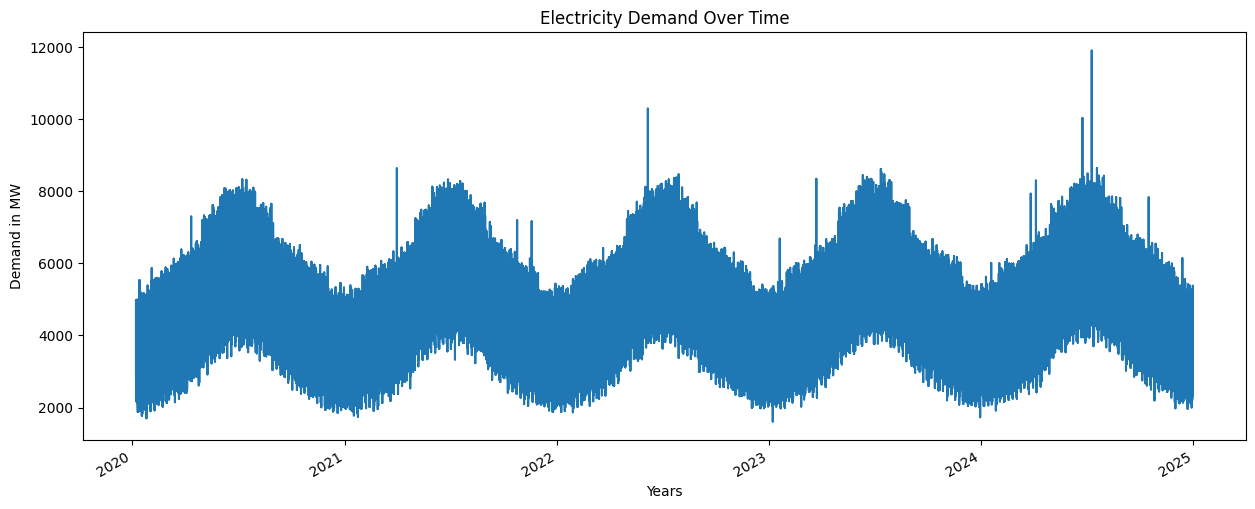

In [245]:
# Plot Demand over time 
#plt.plot(data['Demand'])
data['Demand'].plot(figsize=(15,6),title='Electricity Demand Over Time' )
plt.xlabel('Years')
plt.ylabel('Demand in MW')
plt.show()

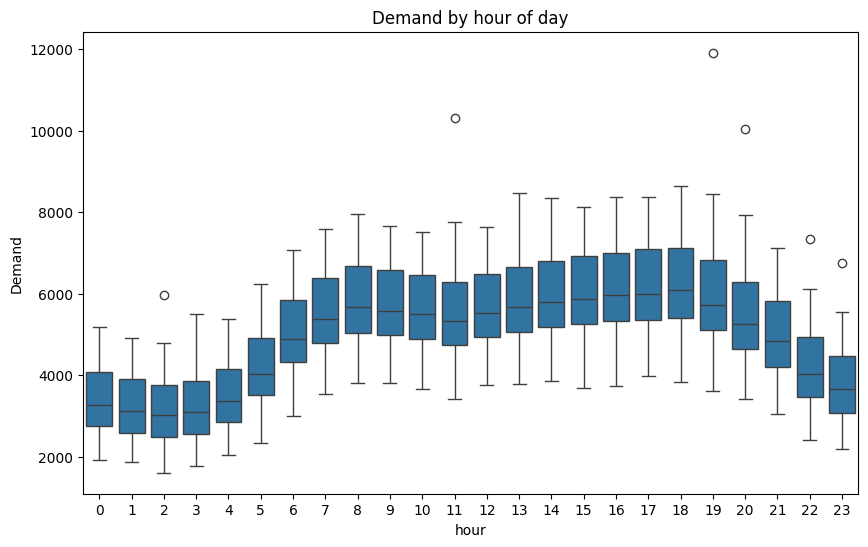

In [246]:
#Visualise demand by hour of day
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='hour',y='Demand')
plt.title('Demand by hour of day')
plt.show()

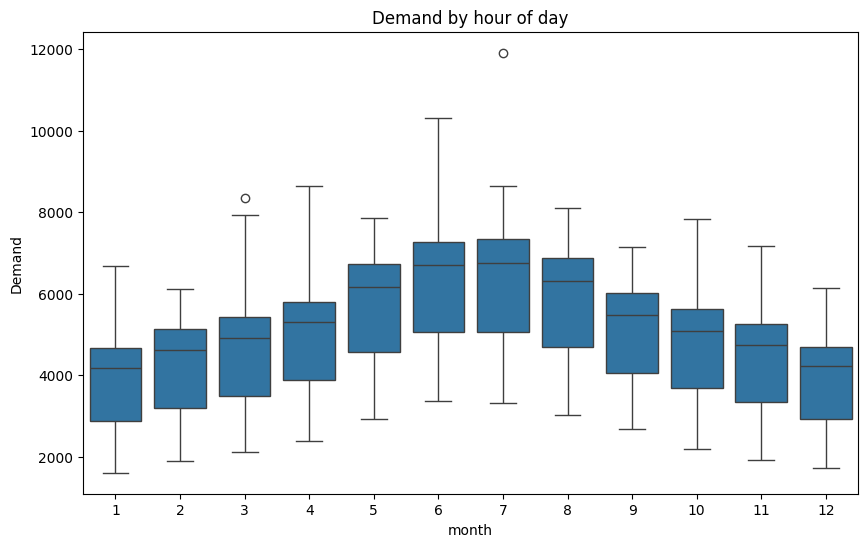

In [247]:
#Visualise demand by hour of day
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='month',y='Demand')
plt.title('Demand by hour of day')
plt.show()

In [248]:
data[data['month']==6].describe()

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_24h,Demand_lag_168h,demand_rolling_mean_24hr,demand_rolling_std_24hr
count,3600.000000,3600.000000,3600.0,3600.00000,3600.0,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,11.499722,2.980000,6.0,2022.00000,2.0,24.160000,166.900000,0.280000,39.031874,54.512041,6275.866276,6260.740701,6172.540770,6268.184632,1270.515388
std,6.923028,1.988475,0.0,1.41441,0.0,1.306984,8.670499,0.449061,7.375616,12.603274,1275.496204,1274.707965,1270.138093,252.761176,100.010403
min,0.000000,0.000000,6.0,2020.00000,2.0,22.000000,152.000000,0.000000,21.474222,20.000000,3373.700878,3370.353180,3338.684113,5427.263643,924.809087
25%,5.750000,1.000000,6.0,2021.00000,2.0,23.000000,159.000000,0.000000,32.688787,45.679228,5064.673258,5056.011946,4980.938008,6061.146425,1203.756802
50%,11.500000,3.000000,6.0,2022.00000,2.0,24.000000,167.000000,0.000000,39.123933,54.385907,6708.257545,6690.299888,6563.883810,6348.017303,1291.483159
75%,17.250000,5.000000,6.0,2023.00000,2.0,25.000000,174.000000,1.000000,45.709044,63.106983,7276.564863,7259.979804,7168.371069,6472.074858,1330.340105
max,23.000000,6.000000,6.0,2024.00000,2.0,27.000000,182.000000,1.000000,50.000000,95.000000,10299.956860,10299.956860,10299.956860,6711.742938,1587.622435


In [249]:
IQR=7276.564863-5064.673258	
max=7276+1.5*IQR
max

10593.8374075

In [250]:
data[(data['month']==6 ) & (data['Demand']>10000)]

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_24h,Demand_lag_168h,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2022-06-07,11,1,6,2022,2,23,158,0,47.152162,52.125259,10299.95686,6774.894269,6424.577379,6539.892027,1558.341912
2024-06-24,20,0,6,2024,2,26,176,0,34.165459,40.676400,10039.27435,6447.904466,7295.660410,6635.716817,1517.477772


<Axes: xlabel='Temperature', ylabel='Demand'>

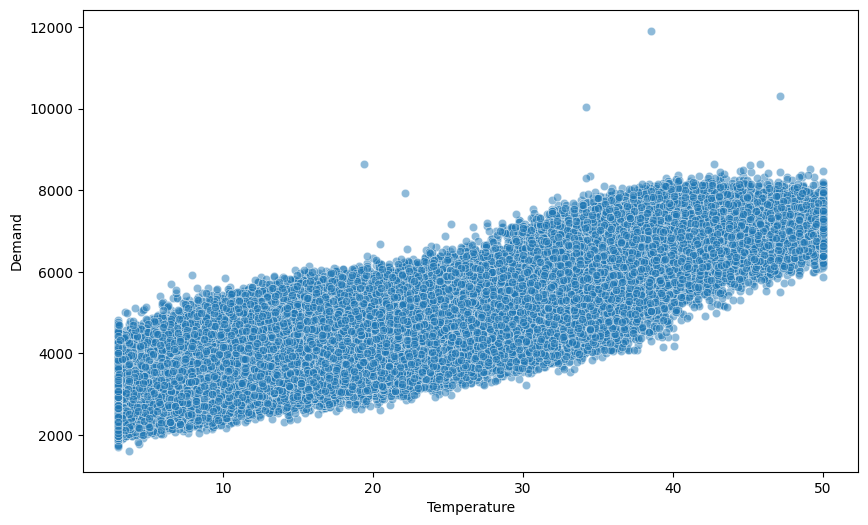

In [251]:
# using scatter plot demand vs temperature
plt.figure(figsize=(10,6))
#plt.scatter(x=data['Temperature'],y=data['Demand'])
sns.scatterplot(data=data,x='Temperature',y='Demand',alpha=0.5)

<Axes: >

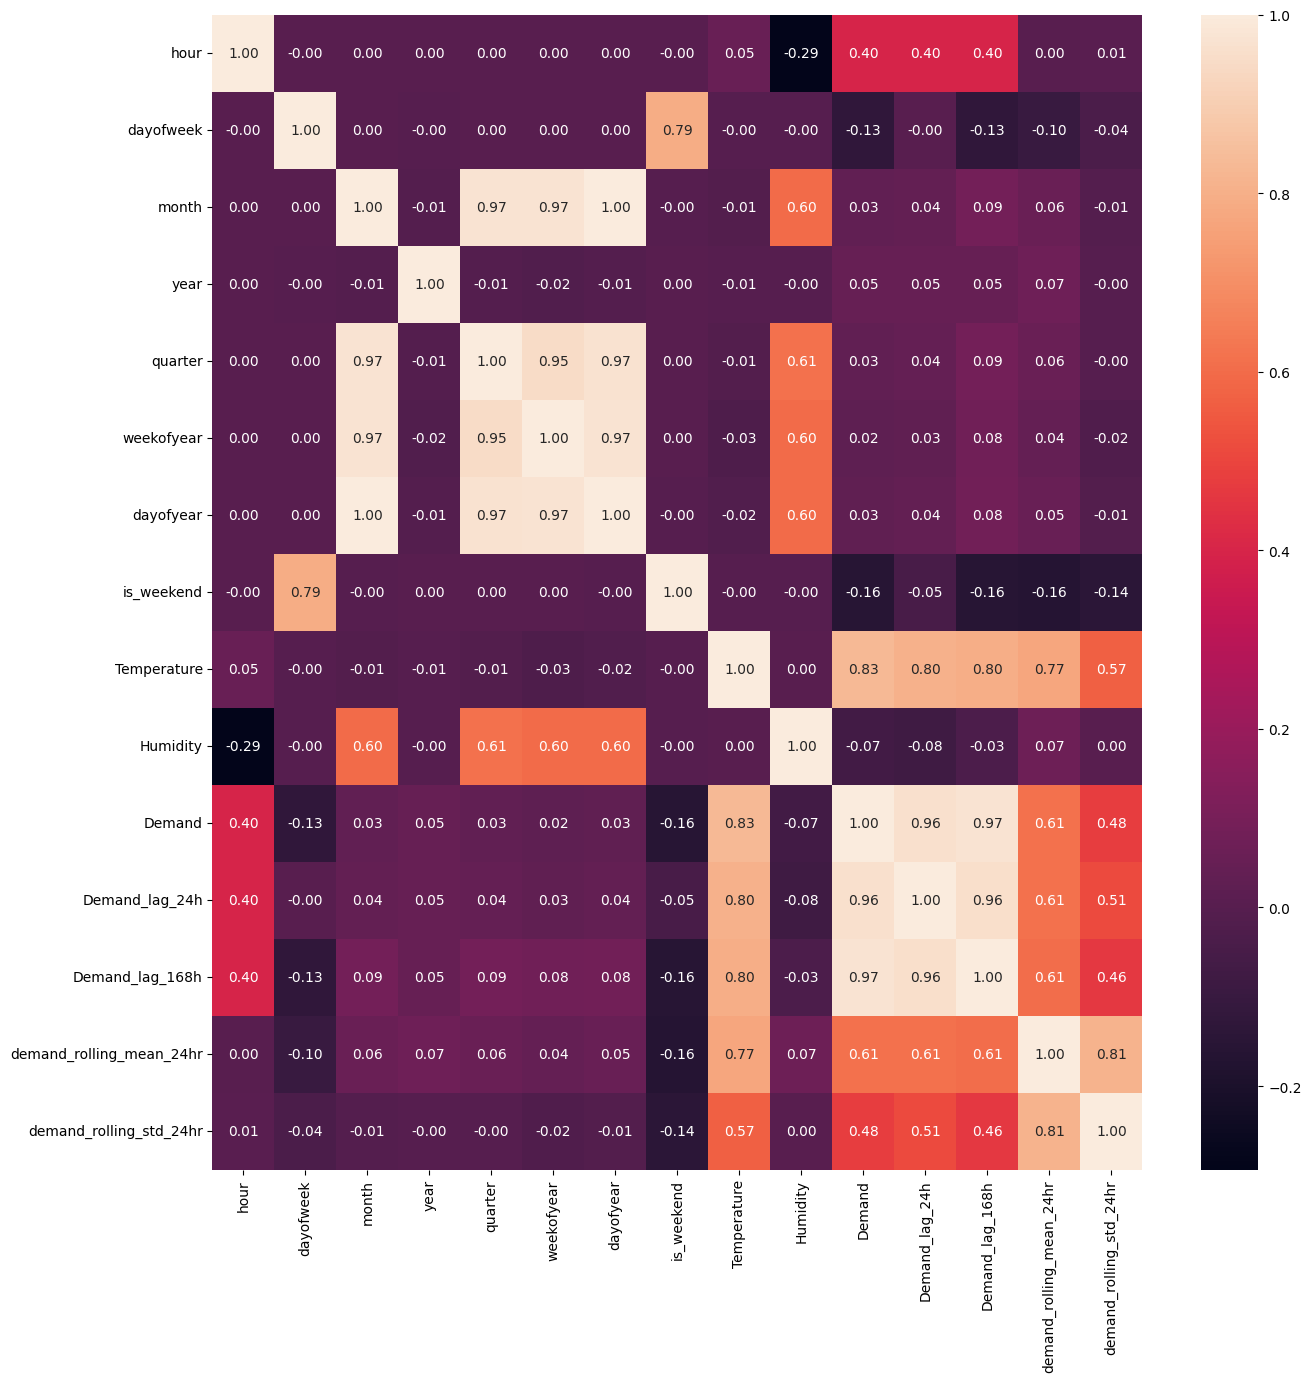

In [252]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt='.2f')

### Build the model

In [253]:
Y=data.Demand

In [254]:
X=data.drop('Demand',axis=1)

In [255]:
X.columns

Index(['hour', 'dayofweek', 'month', 'year', 'quarter', 'weekofyear',
       'dayofyear', 'is_weekend', 'Temperature', 'Humidity', 'Demand_lag_24h',
       'Demand_lag_168h', 'demand_rolling_mean_24hr',
       'demand_rolling_std_24hr'],
      dtype='object')

In [256]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43676 entries, 2020-01-08 to 2024-12-31
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hour                      43676 non-null  int64  
 1   dayofweek                 43676 non-null  int64  
 2   month                     43676 non-null  int64  
 3   year                      43676 non-null  int64  
 4   quarter                   43676 non-null  int64  
 5   weekofyear                43676 non-null  int64  
 6   dayofyear                 43676 non-null  int64  
 7   is_weekend                43676 non-null  int64  
 8   Temperature               43676 non-null  float64
 9   Humidity                  43676 non-null  float64
 10  Demand_lag_24h            43676 non-null  float64
 11  Demand_lag_168h           43676 non-null  float64
 12  demand_rolling_mean_24hr  43676 non-null  float64
 13  demand_rolling_std_24hr   43676 non-null  fl

In [257]:
X_train=X.loc[:'2023-12-31']

In [258]:
X_train

,hour,dayofweek,month,year,quarter,weekofyear,dayofyear,is_weekend,Temperature,Humidity,Demand_lag_24h,Demand_lag_168h,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,1,2,8,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,1,2,8,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,1,2,8,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,1,2,8,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,1,2,8,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,4,52,365,1,6.721774,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,4,52,365,1,7.557696,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,4,52,365,1,3.000000,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [259]:
Y_train=Y.loc[:'2023-12-31']

In [260]:
Y_train

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2023-12-31    4185.721624
2023-12-31    3829.359810
2023-12-31    3416.409325
2023-12-31    3188.143951
2023-12-31    2631.860751
Name: Demand, Length: 34892, dtype: float64

In [261]:
X_test=X.loc['2024-01-01':]

In [262]:
Y_test=Y.loc['2024-01-01':]

In [263]:
X_test.shape,Y_test.shape

((8784, 14), (8784,))

### XGBOOST


In [264]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [265]:
# It a powerful algorithm for time series forcasting as it can handle non linear data easily.
# It can handle seasonality and trends in time series data effectively.
from xgboost import XGBRegressor
# 2 metrics to evaluate the performance of our model
from sklearn.metrics import mean_absolute_error,mean_squared_error
# TimeSeriesSplit class perform appropriate cross validation when dealing with timw series data
from sklearn.model_selection import TimeSeriesSplit


In [266]:
#initialize the model
model_xgb=XGBRegressor(
    n_estimators=1000,
    early_stopping_rounds=50,
    learning_rate=0.01,
    random_state=42,
    objective='reg:squarederror'
)

In [267]:
model_xgb.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train), (X_test, Y_test)],
    verbose=False
)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [268]:
predictions_xgb=model_xgb.predict(X_test)

In [269]:
rmse_xgb=np.sqrt(mean_squared_error(y_true=Y_test,y_pred=predictions_xgb))
mae_xgb=mean_absolute_error(y_true=Y_test,y_pred=predictions_xgb)

In [270]:
print('RMSE XGB: ',rmse_xgb)
print('MAE XGB: ',mae_xgb )

RMSE XGB:  173.68941894781207
MAE XGB:  123.0831199174102


In [271]:
print('RMSE XGB: ',rmse_xgb)
print('MAE XGB: ',mae_xgb )

RMSE XGB:  173.68941894781207
MAE XGB:  123.0831199174102


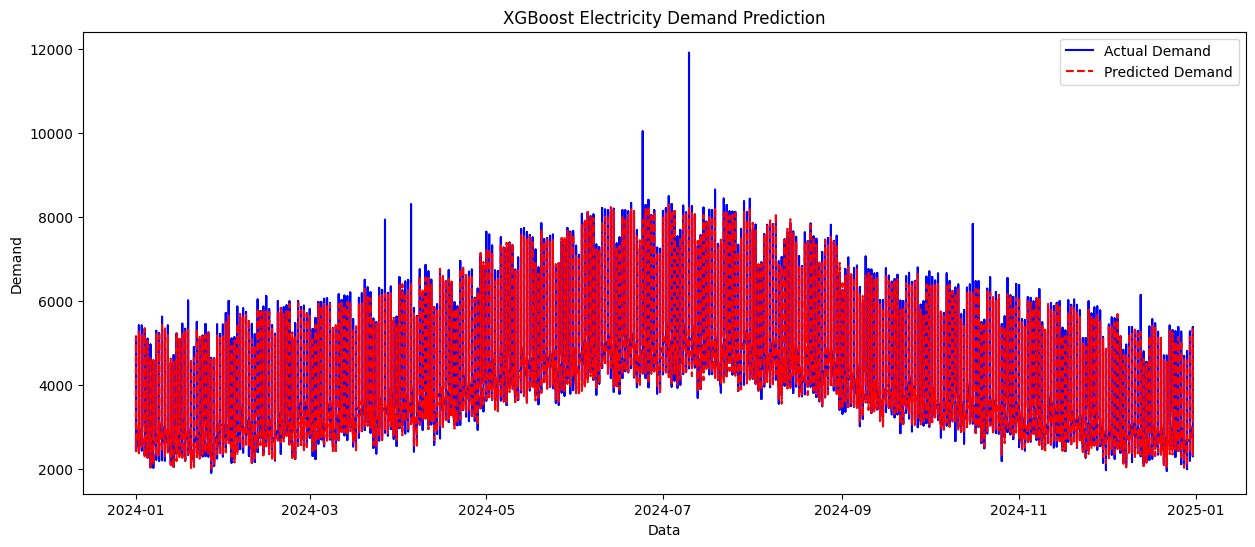

In [284]:
#Visualize the ppredictions
plt.figure(figsize=(15,6))
plt.plot(Y_test.index,Y_test,label='Actual Demand',color='Blue')
plt.plot(Y_test.index,predictions_xgb,label='Predicted Demand',color='Red',linestyle='--')
plt.title('XGBoost Electricity Demand Prediction')
plt.xlabel('Data')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [274]:
import joblib
joblib.dump(model_xgb,'Electricity Demand Forecasting.pkl')

['Electricity Demand Forecasting.pkl']

In [276]:
#load pkl file for fututre predictions
loaded_model=joblib.load('Electricity Demand Forecasting.pkl')

In [278]:
pred=loaded_model.predict(X_test)

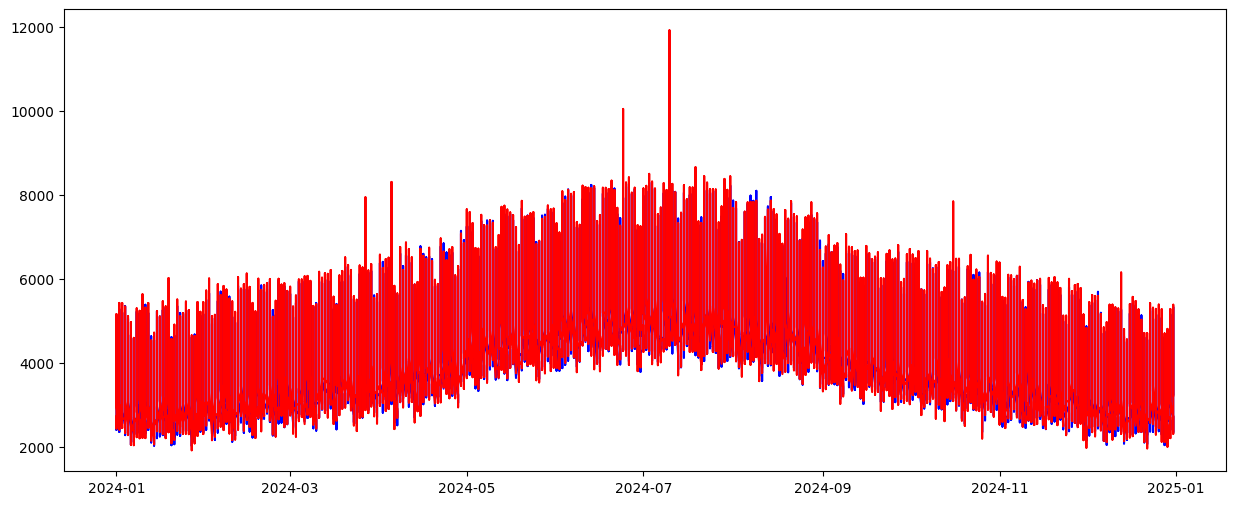

In [288]:
plt.figure(figsize=(15,6))
plt.plot(Y_test.index,pred,color='Blue')
plt.plot(Y_test.index,Y_test,color='Red')

### THE END BY ZAKARIA